**CAPSTONE PROJECT on CAR_ACCIDENT_SEVERITY**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import LabelEncoder
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
#from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
%%capture
! pip install seaborn

In [18]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\NEW\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [19]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [20]:
df.drop(labels=['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY'], axis = 1, inplace = True)
#df1 = df['SEVERITYCODE', 'X', 'Y', 'LOCATION', 'VEHCOUNT', 'WEATHER', 'ROADCOND', 'LIGHTCOND'] #‘Severity’, ‘X’, ‘Y’, ‘Location’, 'Vehcount’, ‘Weather’, ‘Roadcond’, ‘Lighdcond’


In [21]:
df.head()

,SEVERITYCODE,X,Y,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,3,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,3,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight,N


In [22]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [23]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64



In [24]:
#df1 = missing_data
df['X'] = df["X"].astype("float")
df['Y'] = df["Y"].astype("float")
df['WEATHER'] = df['WEATHER'].astype("category")
df['WEATHER'].value_counts()
df['WEATHER']

df['ROADCOND'] = df['ROADCOND'].astype("category")
df['ROADCOND'].value_counts()
df['ROADCOND']

df['LIGHTCOND'] = df['LIGHTCOND'].astype("category")
df['LIGHTCOND'].value_counts()
df['LIGHTCOND']

df['HITPARKEDCAR'] = df['HITPARKEDCAR'].astype("category")
df['HITPARKEDCAR'].value_counts()
df['HITPARKEDCAR']
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
LOCATION          object
VEHCOUNT           int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
HITPARKEDCAR    category
dtype: object

In [27]:
df.dropna(axis=0, how = 'any', inplace= True)

In [28]:
for column in df.columns.values.tolist():
    print(column)
    print (df[column].value_counts())
    print("")

SEVERITYCODE
1    128154
2     56013
Name: SEVERITYCODE, dtype: int64

X
-122.332653    260
-122.344896    246
-122.328079    241
-122.344997    235
-122.299160    229
              ... 
-122.391784      1
-122.302936      1
-122.352122      1
-122.390193      1
-122.312060      1
Name: X, Length: 23398, dtype: int64

Y
47.708655    260
47.717173    246
47.604161    241
47.725036    235
47.579673    229
            ... 
47.536708      1
47.699292      1
47.638632      1
47.662634      1
47.563521      1
Name: Y, Length: 23671, dtype: int64

LOCATION
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N       260
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                 246
6TH AVE AND JAMES ST                                           241
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                 235
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST          229
                                                              ... 
28TH AVE W AND W GALER ST                 

In [30]:
df.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
LOCATION          object
VEHCOUNT           int64
WEATHER         category
ROADCOND        category
LIGHTCOND       category
HITPARKEDCAR    category
dtype: object

In [31]:
df.corr()

,SEVERITYCODE,X,Y,VEHCOUNT
SEVERITYCODE,1.000000,0.010230,0.018436,-0.085234
X,0.010230,1.000000,-0.160175,-0.016030
Y,0.018436,-0.160175,1.000000,0.020603
VEHCOUNT,-0.085234,-0.016030,0.020603,1.000000


In [32]:
#sns.boxplot(x="WEATHER", y="SEVERITYCODE", data=df)
#fig = plt.figure(figsize = (10, 5)) 

df

,SEVERITYCODE,X,Y,LOCATION,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,-122.323148,47.703140,5TH AVE NE AND NE 103RD ST,2,Overcast,Wet,Daylight,N
1,1,-122.347294,47.647172,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,2,Raining,Wet,Dark - Street Lights On,N
2,1,-122.334540,47.607871,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,3,Overcast,Dry,Daylight,N
3,1,-122.334803,47.604803,2ND AVE BETWEEN MARION ST AND MADISON ST,3,Clear,Dry,Daylight,N
4,2,-122.306426,47.545739,SWIFT AVE S AND SWIFT AV OFF RP,2,Raining,Wet,Daylight,N
...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,2,Clear,Dry,Daylight,N
194669,1,-122.344526,47.690924,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,2,Raining,Wet,Daylight,N
194670,2,-122.306689,47.683047,20TH AVE NE AND NE 75TH ST,2,Clear,Dry,Daylight,N
194671,2,-122.355317,47.678734,GREENWOOD AVE N AND N 68TH ST,1,Clear,Dry,Dusk,N


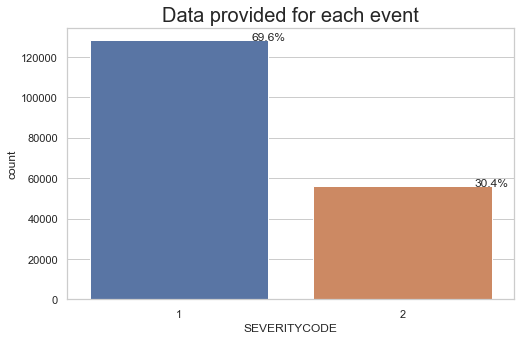

In [33]:
#countplot
#sns.countplot(x="SEVERITYCODE",data=df)
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="SEVERITYCODE", data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


In [34]:
df_weather_cond= df['WEATHER'].value_counts().to_frame()
df_weather_cond.rename(columns={'WEATHER': 'value_counts'}, inplace=True)
df_weather_cond.index.name = 'WEATHER'
df_weather_cond

,value_counts
WEATHER,
Clear,108833
Raining,31987
Overcast,27105
Unknown,13846
Snowing,888
Other,765
Fog/Smog/Smoke,553
Sleet/Hail/Freezing Rain,112
Blowing Sand/Dirt,49


In [35]:
lightcond_counts = df['LIGHTCOND'].value_counts().to_frame()
lightcond_counts.rename(columns={'LIGHTCOND': 'value_counts'}, inplace=True)
lightcond_counts.index.name = 'LIGHTCOND'
lightcond_counts.head(10)

,value_counts
LIGHTCOND,
Daylight,113522
Dark - Street Lights On,47250
Unknown,12416
Dusk,5763
Dawn,2422
Dark - No Street Lights,1450
Dark - Street Lights Off,1145
Other,188
Dark - Unknown Lighting,11


In [36]:
#roadcond
roadcond_counts = df['ROADCOND'].value_counts().to_frame()
roadcond_counts.rename(columns={'ROADCOND': 'value_counts'}, inplace=True)
roadcond_counts.index.name = 'ROADCOND'
roadcond_counts.head(10)

,value_counts
ROADCOND,
Dry,121871
Wet,46009
Unknown,13795
Ice,1174
Snow/Slush,984
Other,116
Standing Water,102
Sand/Mud/Dirt,63
Oil,53


In [37]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [ ]:
#!conda update -n base -c defaults conda

In [45]:
# create a Stamen Toner map of the world centered around Canada
#df['LOCATION']
world_map = folium.Map(location=[47.49557292 , -122.2389494], zoom_start=4, tiles='Stamen Terrain')

# display map
world_map

In [41]:
x_min = df['X'].min()
x_max = df['X'].max()
y_min = df['Y'].min()
y_max = df['Y'].max()
print(x_min,x_max,y_min,y_max)

-122.41909109999999 -122.2389494 47.49557292 47.73414158
